In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
dataset = pd.read_csv("C:/Users/user/Downloads/candy-data.csv")
dataset

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [8]:
dataset.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [14]:
X1=dataset.drop(["pricepercent", "competitorname"],axis=1)

In [15]:
Y1=dataset["pricepercent"]

In [16]:
X1

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,52.341465
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,41.904308


In [17]:
Y1

0     0.860
1     0.511
2     0.116
3     0.511
4     0.511
      ...  
80    0.116
81    0.116
82    0.313
83    0.267
84    0.848
Name: pricepercent, Length: 85, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size=0.25,random_state=42)

In [19]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (11,)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dense_2 (Dense)             (None, 16)                336       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,669
Trainable params: 1,669
Non-trainable params: 0
_________________________________________________________________


In [21]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 231ms/step - loss: 5.9025 - mse: 5.9025 - val_loss: 0.8025 - val_mse: 0.8025
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.5362 - mse: 0.5362 - val_loss: 0.1393 - val_mse: 0.1393
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.1297 - mse: 0.1297 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.0688 - val_mse: 0.0688
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0863 - mse: 0.0863 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0856 - mse: 0.0856 - val_loss: 0.0689 - val_mse: 0.0689
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0854 - mse: 0.0

2/2 [==============================] - 0s 36ms/step - loss: 0.1551 - mse: 0.1551 - val_loss: 0.1126 - val_mse: 0.1126
Epoch 64/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0809 - mse: 0.0809 - val_loss: 0.0672 - val_mse: 0.0672
Epoch 65/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0727 - mse: 0.0727 - val_loss: 0.0670 - val_mse: 0.0670
Epoch 66/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0703 - mse: 0.0703 - val_loss: 0.0671 - val_mse: 0.0671
Epoch 67/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0790 - mse: 0.0790 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 68/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0998 - mse: 0.0998 - val_loss: 0.1241 - val_mse: 0.1241
Epoch 69/100
2/2 [==============================] - 0s 32ms/step - loss: 0.2034 - mse: 0.2034 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 70/100
2/2 [==============================] - 0s 32ms/step - loss: 0.1453 - mse: 0.1453 - 

In [22]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.0832 - mse: 0.0832


[0.08317318558692932, 0.08317318558692932]

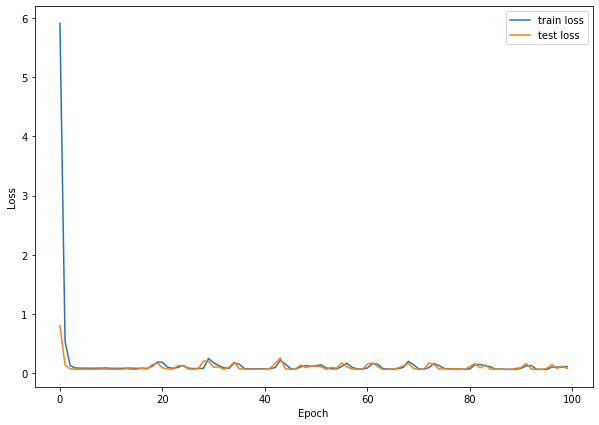

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

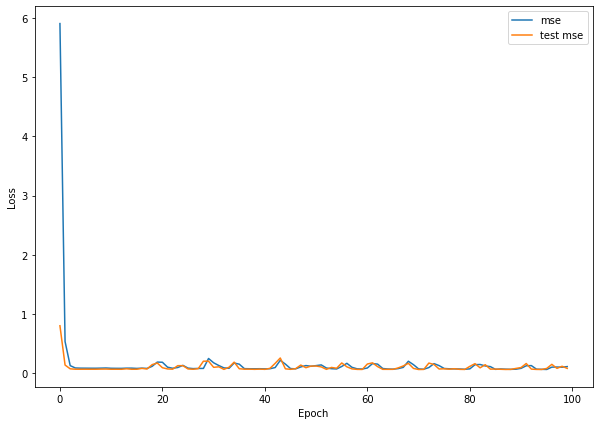

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()